In [75]:
from PIL import Image
import pytesseract
from pytesseract import Output
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import textdistance
import os

In [76]:
path = "../tests/"
dir_list = sorted(os.listdir(path))
print(dir_list)

['.DS_Store', 'test01.jpeg', 'test02.png', 'test03.png', 'test04.png', 'test05.png', 'test06.png', 'test07.jpeg', 'test08.jpeg', 'test09.png', 'test10.png', 'test11.png', 'test12.jpeg', 'test13.png', 'test14.png', 'test15.png']


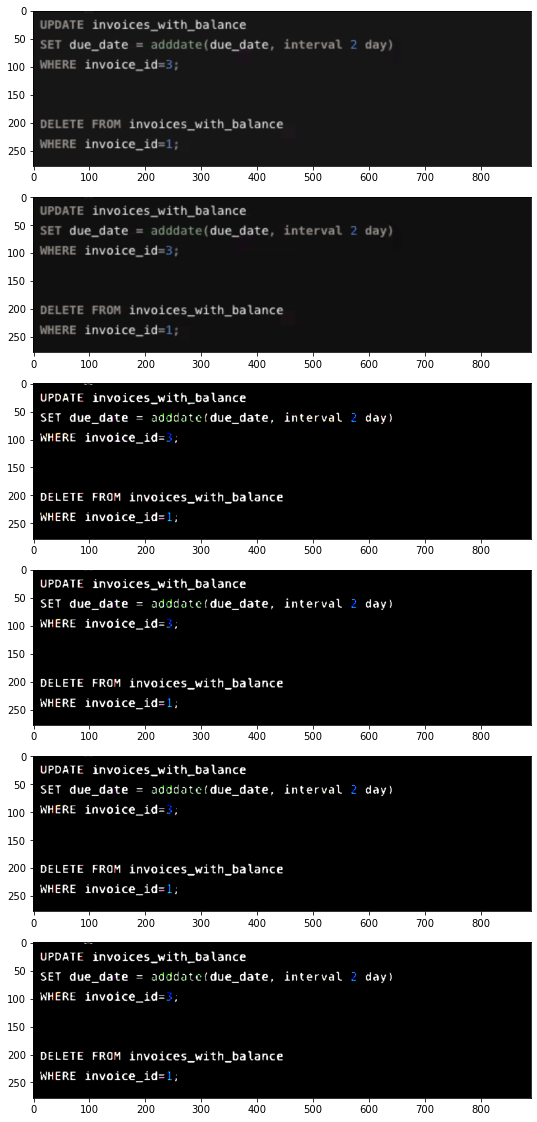

In [95]:
filename = dir_list[15]

img = cv2.imread(path + filename)
#img = np.array(Image.open(filename))
imgOg = img

noiseReduction = True

if noiseReduction:

    norm_img = np.zeros((img.shape[0], img.shape[1]))

    img1 = cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)
    img2 = cv2.threshold(img1, 100, 255, cv2.THRESH_BINARY,cv2.THRESH_OTSU)[1]
    img3 = cv2.fastNlMeansDenoisingColored(img2, None, 10, 10, 7, 15)
    img4 = cv2.GaussianBlur(img3, (1, 1), 0)
    #imgf2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)


    kernel = np.ones((1,1), np.uint8)
    img5 = cv2.erode(img4, kernel,iterations = 1)

    plt.figure(figsize=(30,20))
    plt.subplot(6,1,1)
    plt.imshow(img)
    plt.subplot(6,1,2)
    plt.imshow(img1)
    plt.subplot(6,1,3)
    plt.imshow(img2)
    plt.subplot(6,1,4)
    plt.imshow(img3)
    plt.subplot(6,1,5)
    plt.imshow(img4)
    plt.subplot(6,1,6)
    plt.imshow(img5)
    '''
    norm_img = np.zeros((img.shape[0], img.shape[1]))
    img2 = cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)
    #img3 = cv2.threshold(img2, 100, 255, cv2.THRESH_BINARY)[1]
    img3 = cv2.threshold(img2, 29, 255, cv2.THRESH_BINARY)[1]
    img4 = cv2.GaussianBlur(img3, (1, 1), 0)
    '''

In [96]:
imgs = [img, img1, img2, img3, img4, img5]

for i, imagen in enumerate(imgs):
    results = pytesseract.image_to_data(imagen, lang="eng+spa", output_type=Output.DICT)
    predY = ' '.join([ r for r in results['text'] if r != ''])
    print(i, predY)

0 UPDATE invoices_with_balance SET due_date = adddate(due_date, interval 2 day) WHERE invoice_id=3; DELETE FROM invoices_with_balance WHERE invoice_id=1;
1 UPDATE invoices_with_balance SET due_date = adddate(due_date, interval 2 day) WHERE invoice_id=3; DELETE FROM invoices_with_balance WHERE invoice_id=1;
2 UPDATE invoices_with_balance SET due_date = adddate{due_date, interval 2 day) WHERE invoíce_id=:; DELETE FROM invoices_with_balance WHERE invoice_id=1;
3 UPDATE invoices_with_balance SET due_date = adddate(due_date, interval ? day) WHERE invoice_id=:; DELETE FROM invoices_with_balance WHERE invoice_id=1;
4 UPDATE invoices_with_balance SET due_date = adddate(due_date, interval ? day) WHERE invoice_id=:; DELETE FROM invoices_with_balance WHERE invoice_id=1;
5 UPDATE invoices_with_balance SET due_date = adddate(due_date, interval ? day) WHERE invoice_id=:; DELETE FROM invoices_with_balance WHERE invoice_id=1;


1: 0,1 All text 2-5 Correct
2: 2-5
3: 2
4: 0-5
5: 0-2
6: 0-5
7: -
8: -
9: -
10: 0
11: 1-5
12: 2-5
13: 2, 3-5
14: 2, 3-5
15: 0-1
16: 